In [6]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel as af_Sobel

In [2]:
dicom_dir = "1"
output_dir = "Output"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

In [ ]:
# Folder has to be in format "Subject_ID -> CT and RTSTRUCT (all captial)"
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\Medical-imaging-Research\\Data\\Prostate Cases\\1\\"
output_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

In [ ]:
contour_table = pd.DataFrame()
number = []
name = []
for i in range(24):
    number.append(contours[i]["number"])
    name.append(contours[i]["name"])
#contour_table["number"] = number
contour_table["name"] = name

In [ ]:
contour_table

# Prostate

In [5]:
#Find location of the contour where labels == 1 (prostate)
a = np.argwhere(labels==True)
a[a[..., 3] == 1][0]

array([ 63, 246, 245,   1], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

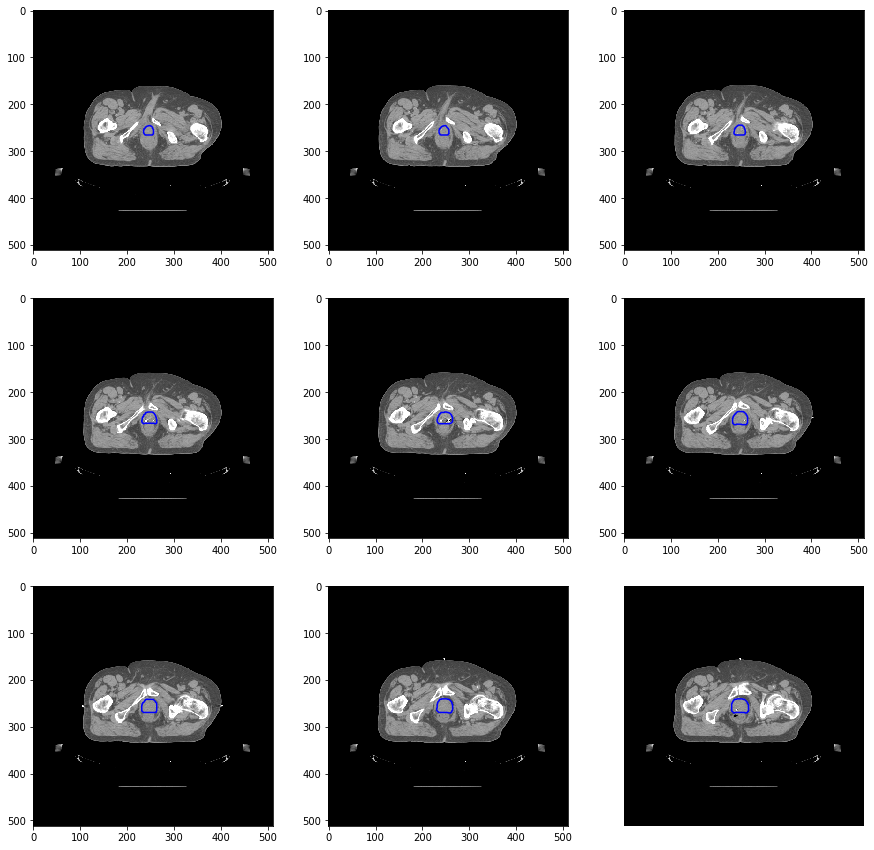

In [6]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# rectum

In [7]:
#Find location of the contour where labels == 4 (rectum)
a = np.argwhere(labels==True)
a[a[..., 3] == 4][0]

array([ 55, 280, 246,   4], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

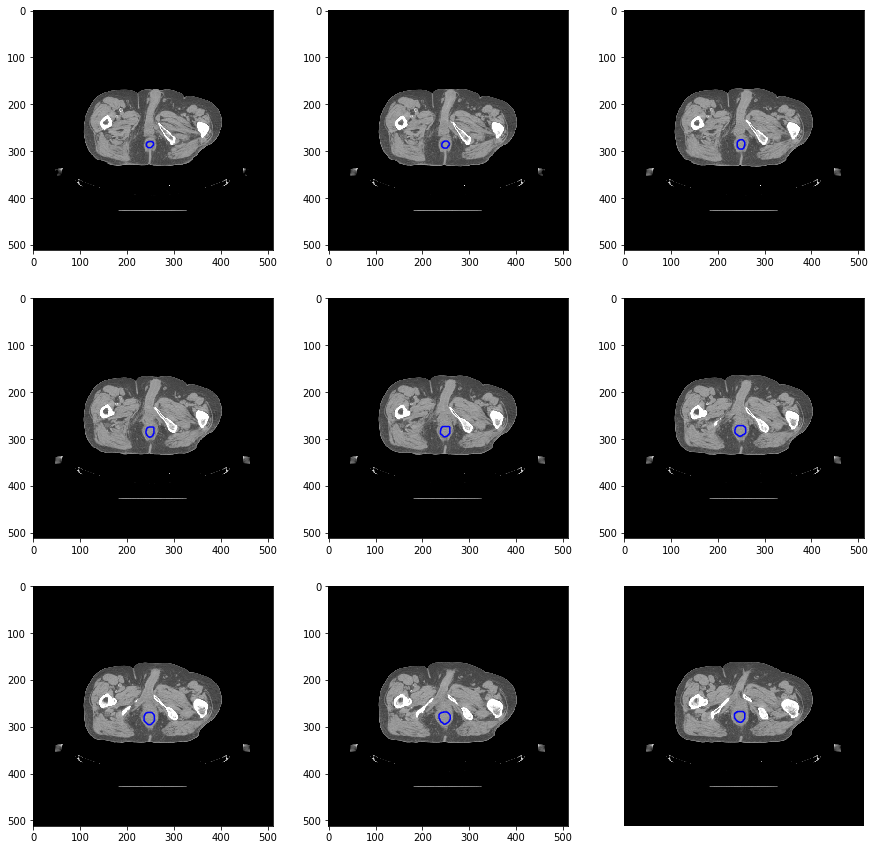

In [8]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 55, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 4][i + 55, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# bladder

In [9]:
#Find location of the contour where labels == 5 (bladder)
a = np.argwhere(labels==True)
a[a[..., 3] == 5][0]

array([ 73, 231, 250,   5], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

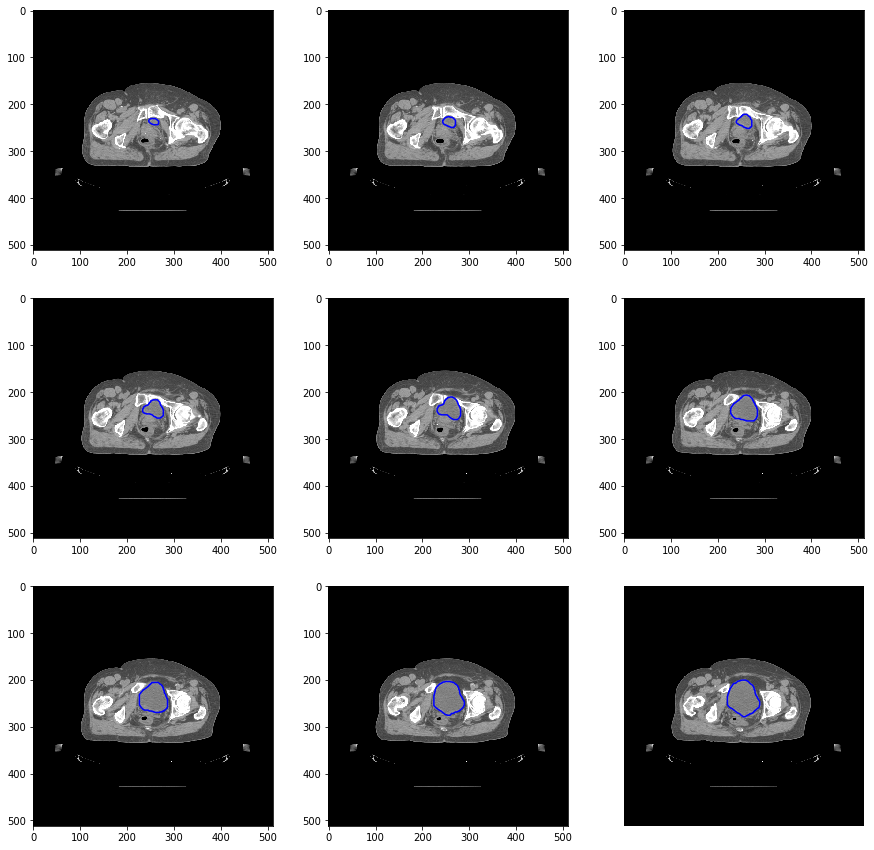

In [10]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 73, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 5][i + 73, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Seminal vesicles

In [11]:
#Find location of the contour where labels == 2 (Seminal vesicles)
a = np.argwhere(labels==True)
a[a[..., 3] == 2][0]

array([ 77, 266, 234,   2], dtype=int64)

C:\Users\lykha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


(-0.5, 511.5, 511.5, -0.5)

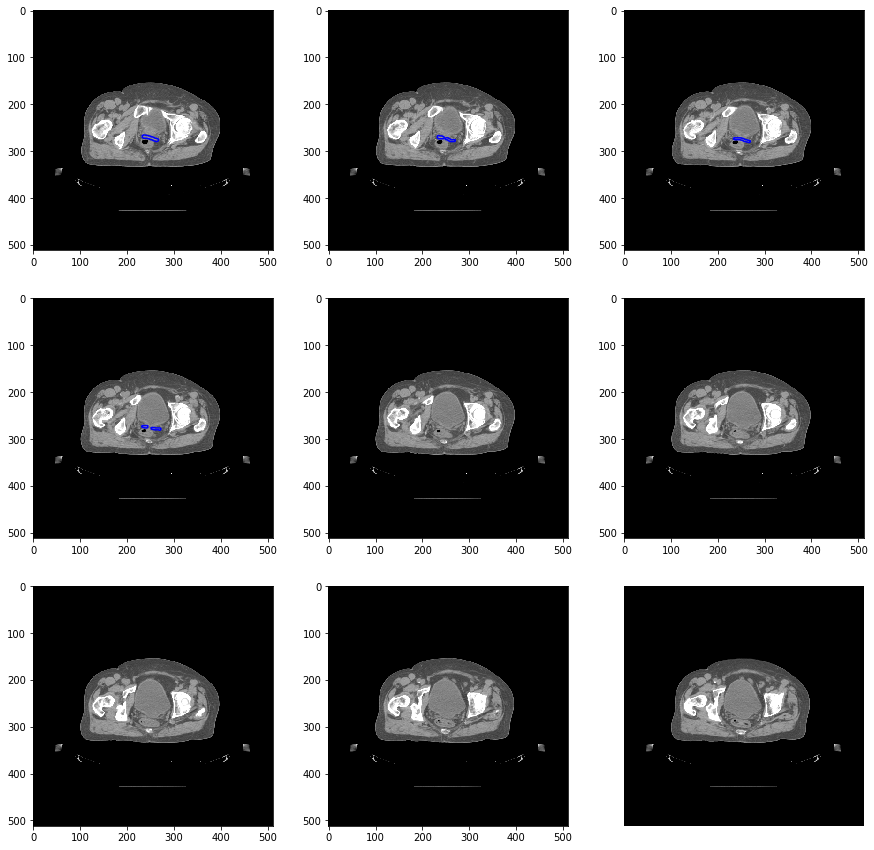

In [12]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 77, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 2][i + 77, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Femural Heads

In [13]:
#Find location of the contour where labels == 4 (Femural Heads)
a = np.argwhere(labels==True)
a[a[..., 3] == 6][0]

array([ 60, 235, 148,   6], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

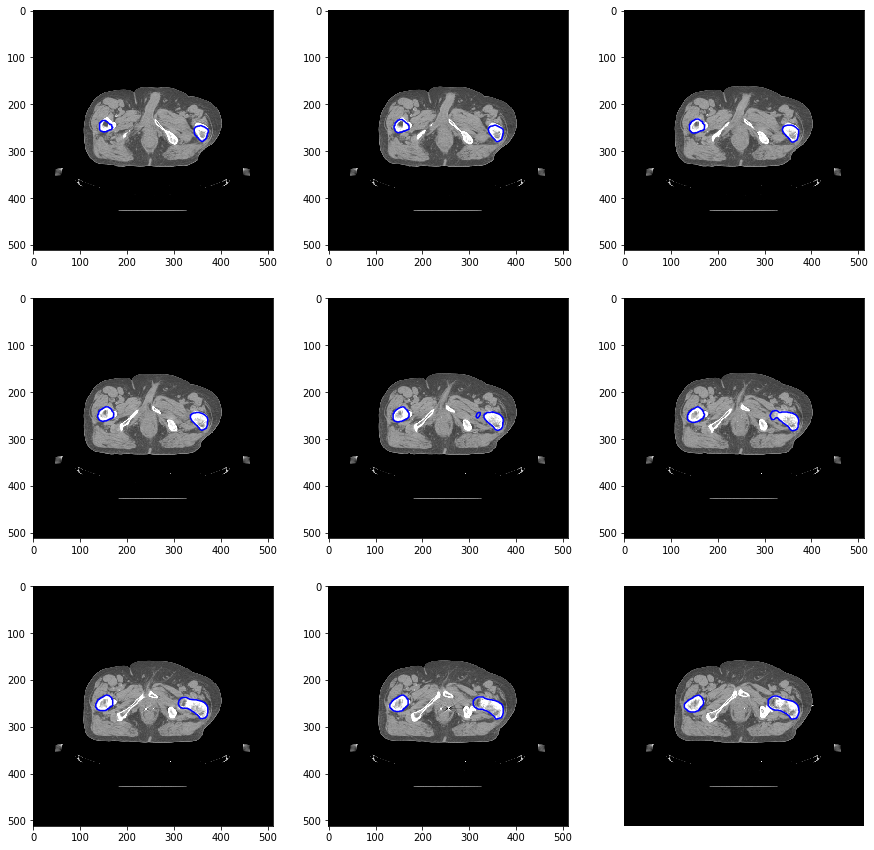

In [14]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 60, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 6][i + 60, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Prostate

# Sobel and 3D Permutation

In [22]:
a = np.argwhere(labels==True)
a[a[..., 3] == 1][0]

array([ 63, 246, 245,   1], dtype=int64)

In [26]:
target_img1 = images[75, ...]
target_label1 = labels[..., 1][75, ...]

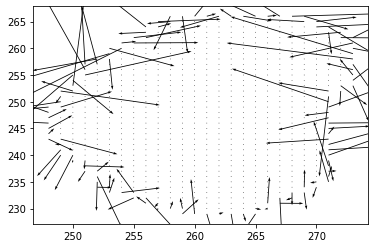

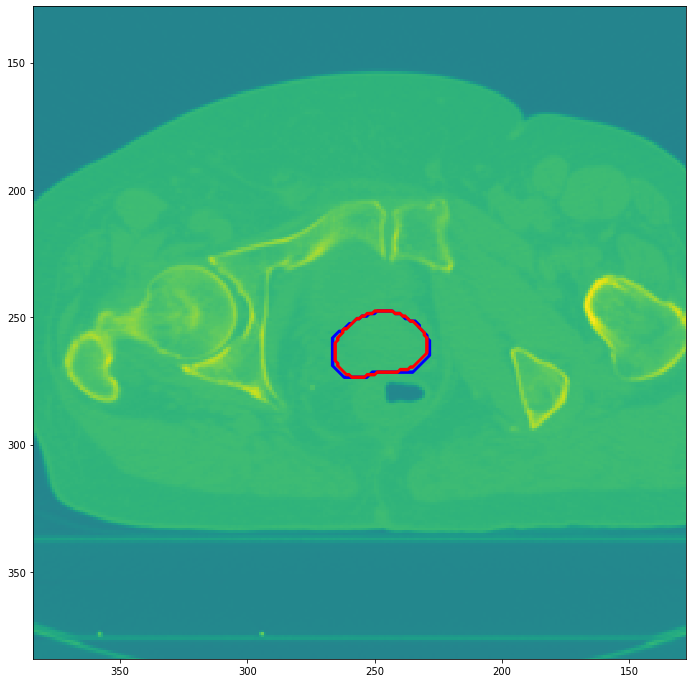

In [42]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 30
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 1
seed=123
dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
du_1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=True, plot=True, display=True)

# testing on different slices

(200.0, 300.0, 300.0, 200.0)

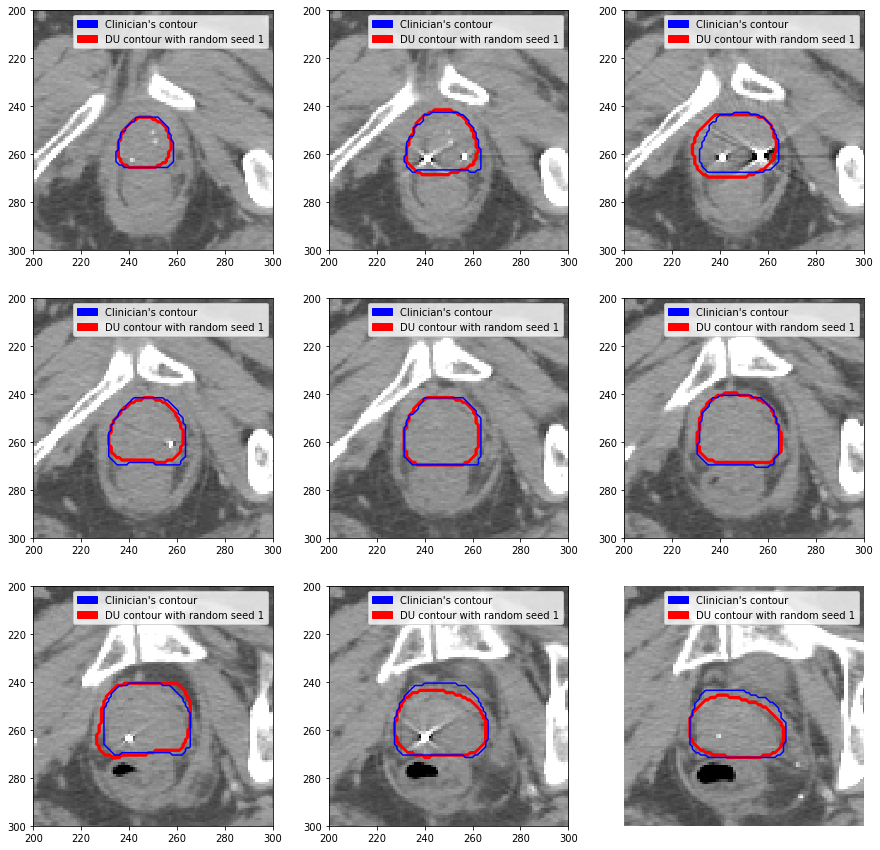

In [38]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L, roi_z  = af_Sobel.assd_Sobel(images[65 + i, ...], labels[..., 1][65 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour)

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[65 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 1][65 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

In [28]:
assd_contour.shape

(186, 512, 512)

In [ ]:
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\coutour_segmentation_3\\Output"
RTStruct([assd_contour], "prostate", slices, fname=os.path.join(destination_path, 'Prostate_contour.dcm'))

# rectum

# Sobel and 3D Permutation

In [9]:
a = np.argwhere(labels==True)
a[a[..., 3] == 4][0]

array([ 55, 280, 246,   4], dtype=int64)

In [44]:
target_img2 = images[55, ...]
target_label2 = labels[..., 4][55, ...]

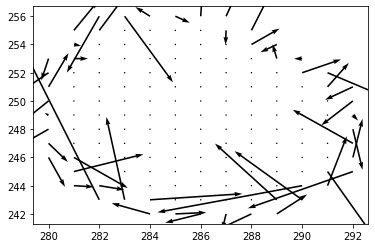

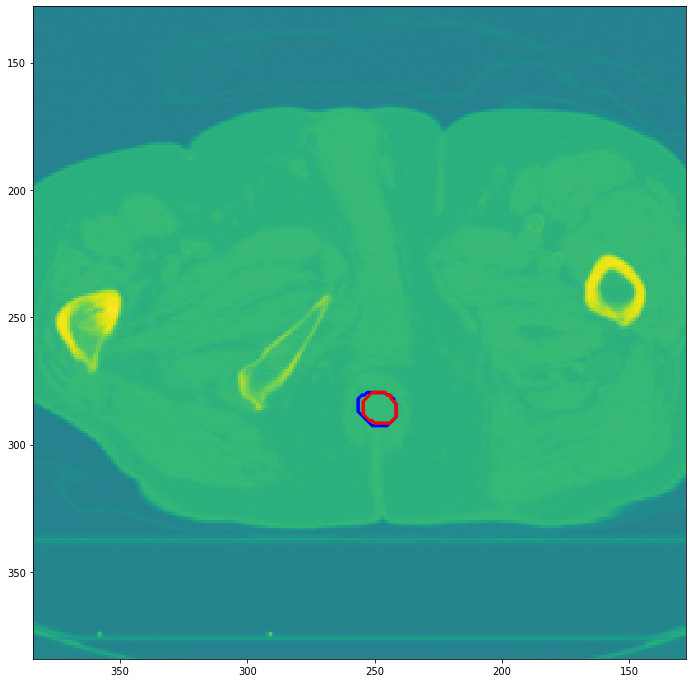

In [45]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 20
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 4
seed=123
dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(target_img2, target_label2, voxelsize, a, SD, circles, seed, k, w, images, labels, 4, smooth=True)
du_2 = af_Sobel.plotting_assd(dx, dy, mask, target_img2, quiver=True, plot=True, display=True)

# testing on different slices

(200.0, 300.0, 300.0, 200.0)

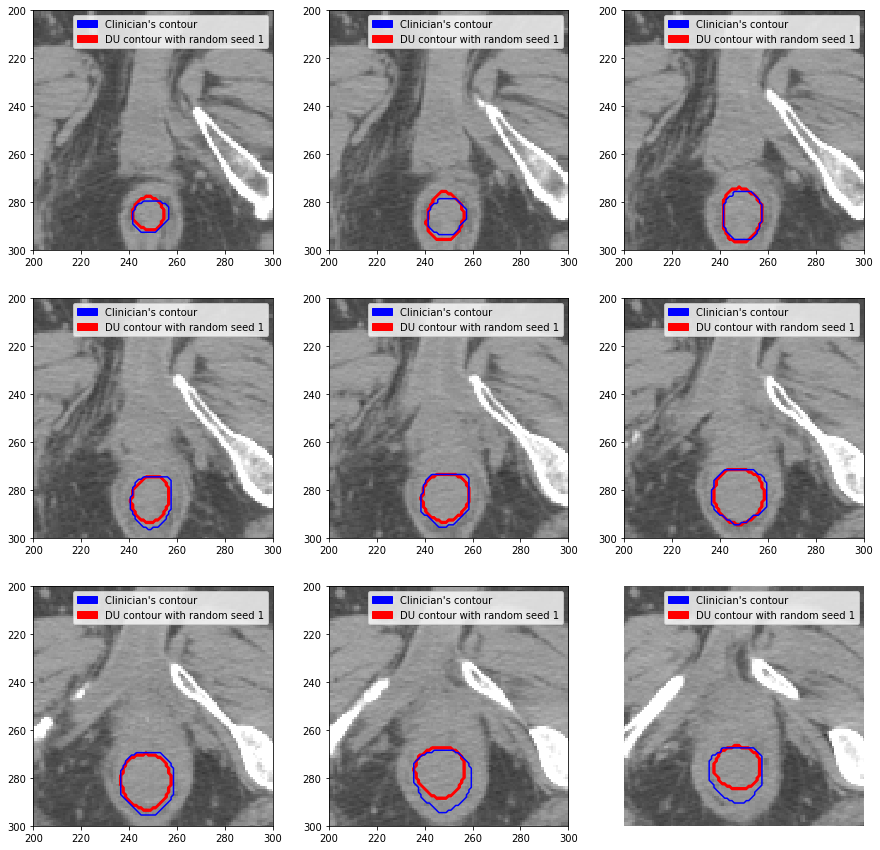

In [46]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L, roi_z  = af_Sobel.assd_Sobel(images[55 + i, ...], labels[..., 4][55 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 4, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img2, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour)

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[55 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 4][55 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

dummy_mask = labels
RTStruct([dummy_mask], "rectum", slices, fname=os.path.join(destination_path, 'Rectum_contour.dcm'))

In [50]:
assd_contour_rectum=assd_contour

In [ ]:
destination_path = "Output"
RTStruct([assd_contour], "rectum", slices, fname=os.path.join(destination_path, 'Rectum_contour.dcm'))

# bladder

# Sobel and 3D Permutation

In [34]:
a = np.argwhere(labels==True)
a[a[..., 3] == 5][0]

array([ 73, 231, 250,   5], dtype=int64)

In [51]:
target_img3 = images[73, ...]
target_label3 = labels[..., 5][73, ...]

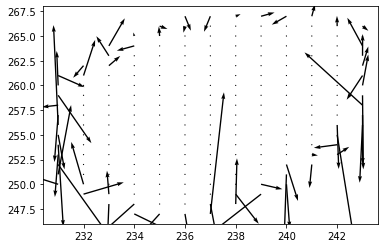

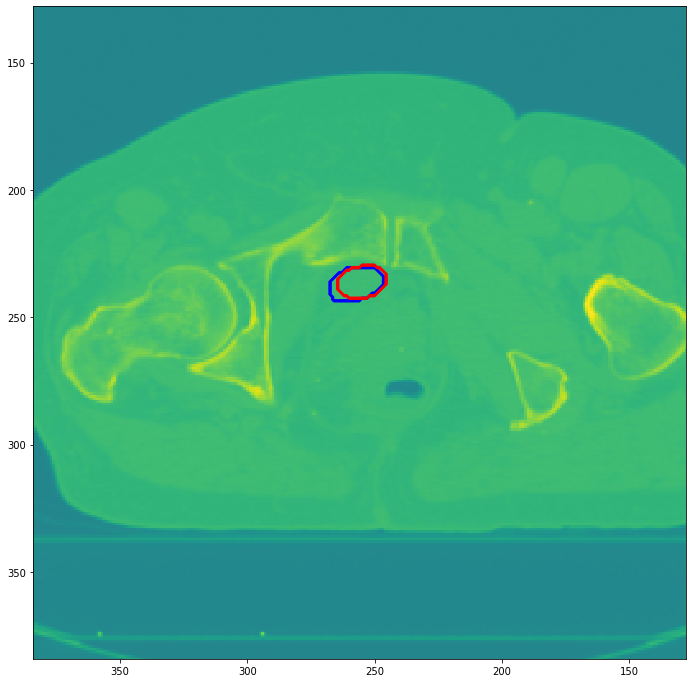

In [60]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 40
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 5
seed=123
dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(target_img3, target_label3, voxelsize, a, SD, circles, seed, k, w, images, labels, 5, smooth=True)
du_3 = af_Sobel.plotting_assd(dx, dy, mask, target_img3, quiver=True, plot=True, display=True)

# testing on different slices

(200.0, 300.0, 300.0, 200.0)

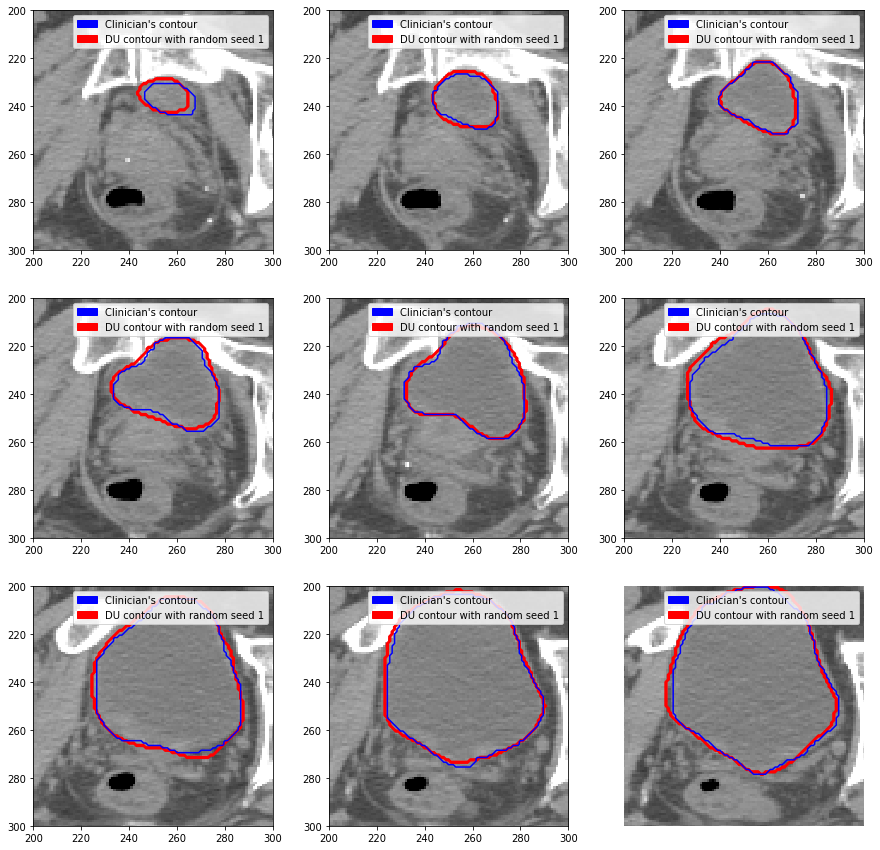

In [61]:
assd_contour = []

for i in range(9):
        dx, dy, mask, t, L, roi_z  = af_Sobel.assd_Sobel(images[73 + i, ...], labels[..., 5][73 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 5, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img3, quiver=False, plot=False)
        du_3 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_3)) #surface
assd_contour = np.array(assd_contour)

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[73 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 5][73 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

In [54]:
assd_contour_bladder=assd_contour

In [ ]:
RTStruct([assd_contour], "bladder", slices, fname=os.path.join(destination_path, 'Bladder_contour.dcm'))

# Seminal vesicles

# Sobel and 3D Permutation

In [3]:
a = np.argwhere(labels==True)
a[a[..., 3] == 2][0]

array([ 77, 266, 234,   2], dtype=int64)

In [66]:
target_img4 = images[77, ...]
target_label4 = labels[..., 2][77, ...]

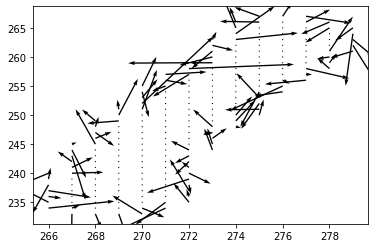

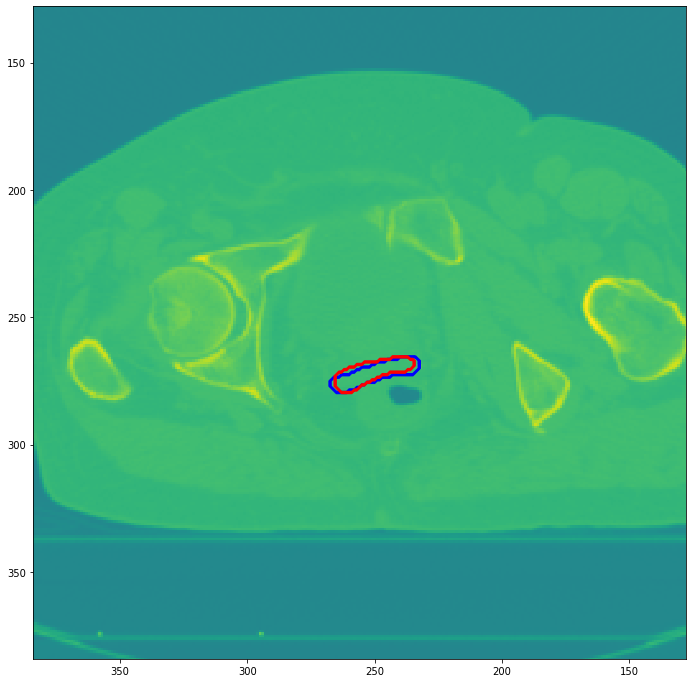

In [76]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 50
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 2
seed=123
dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(target_img4, target_label4, voxelsize, a, SD, circles, seed, k, w, images, labels, 2, smooth=True)
du_4 = af_Sobel.plotting_assd(dx, dy, mask, target_img4, quiver=True, plot=True, display=True)

# testing on different slices

(200.0, 300.0, 300.0, 200.0)

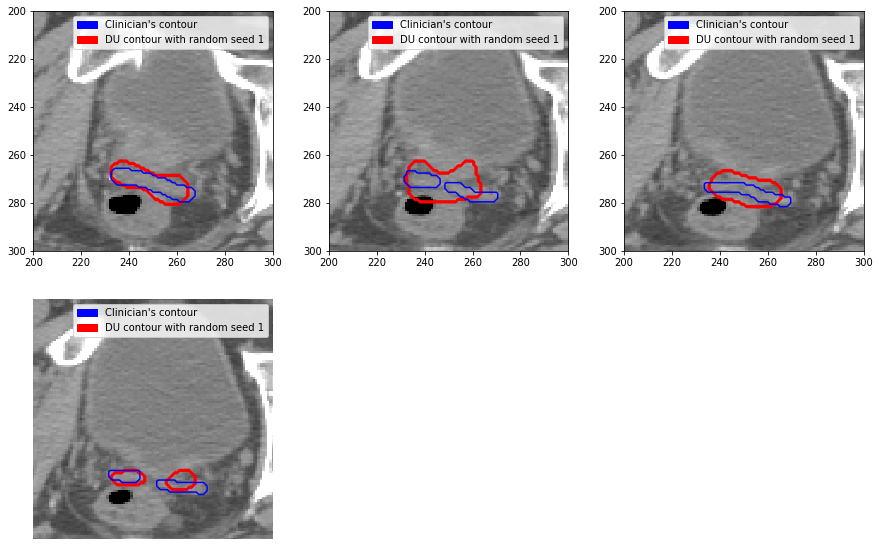

In [77]:
assd_contour = []

for i in range(4):
        dx, dy, mask, t, L, roi_z  = af_Sobel.assd_Sobel(images[77 + i, ...], labels[..., 2][77 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 2, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img4, quiver=False, plot=False)
        du_4 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_4)) #surface
assd_contour = np.array(assd_contour)

plt.figure(figsize=(15, 15))
for i in range(4):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[77 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 2][77 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

In [64]:
assd_contour_seminal=assd_contour

In [ ]:
RTStruct([assd_contour], "seminal vesicles", slices, fname=os.path.join(destination_path, 'SV_contour.dcm'))

# Femural Heads

# Sobel and 3D Permutation

In [16]:
a = np.argwhere(labels==True)
a[a[..., 3] == 6][0]

array([ 60, 235, 148,   6], dtype=int64)

In [17]:
target_img5 = images[60, ...]
target_label5 = labels[..., 6][60, ...]

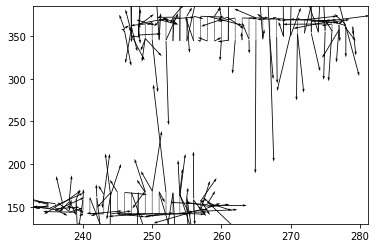

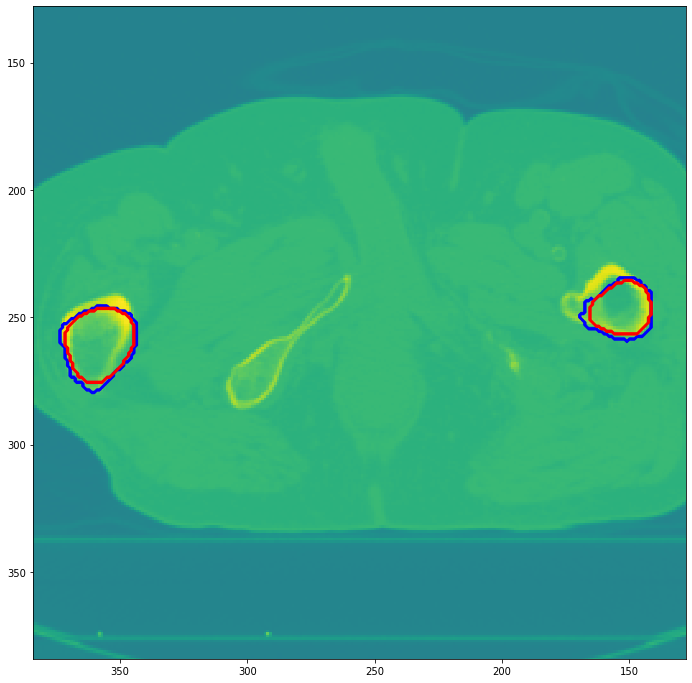

In [78]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 30
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 6
seed=123
dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(target_img5, target_label5, voxelsize, a, SD, circles, seed, k, w, images, labels, 6, smooth=True)
du_5 = af_Sobel.plotting_assd(dx, dy, mask, target_img5, quiver=True, plot=True, display=True)

# testing on different slices

(100.0, 400.0, 200.0, 350.0)

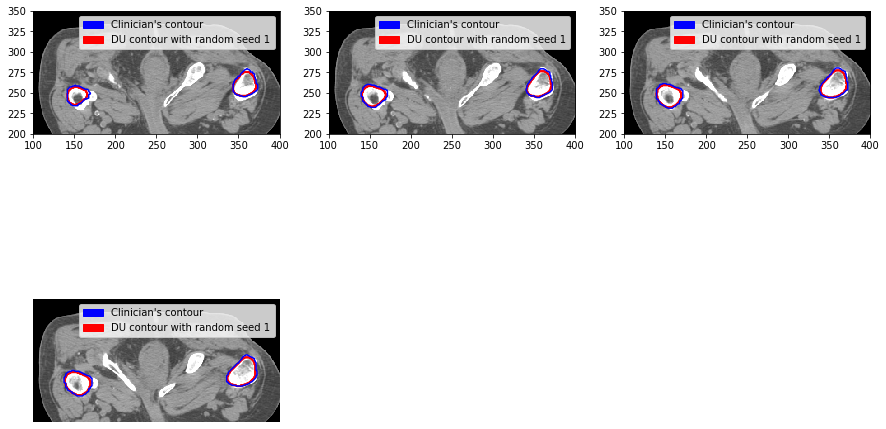

In [81]:
assd_contour = []

for i in range(4):
        dx, dy, mask, t, L, roi_z  = af_Sobel.assd_Sobel(images[60 + i, ...], labels[..., 6][60 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 6, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img5, quiver=False, plot=False)
        du_4 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_4)) #surface
assd_contour = np.array(assd_contour)


plt.figure(figsize=(15, 15))
for i in range(4):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[60 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 6][60 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(100, 400)
    plt.ylim(200, 350)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

In [ ]:
assd_contour_fh = assd_contour

In [ ]:
RTStruct([assd_contour], "femural heads", slices, fname=os.path.join(destination_path, 'Femural_Heads_contour.dcm'))